In [1]:
import pandas as pd
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt

RSSI-距离关系: [[ -2.38368781]
 [-49.71997549]]


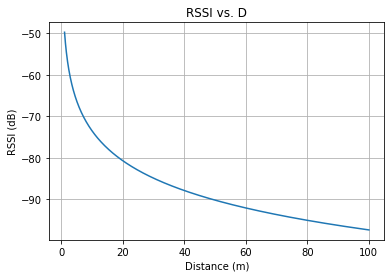

In [2]:

def custom_gaussian_filter(data):
    mean = data.mean()
    std_dev = data.std()

    # 取落在平均值±标准差区间的RSSI值
    filtered_data = data[(data >= mean - std_dev) & (data <= mean + std_dev)]

    # 计算过滤后数据的平均值
    filtered_mean = filtered_data.mean()

    return filtered_mean

# 读取Excel文件
file_path = r'C:\\Users\Administrator\Desktop\WSN+IMU定位\\数据\\测试集\\新信标20mRSSI.xlsx'
df = pd.read_excel(file_path, header=None)

# 保存过滤后的RSSI数据
output_data = []

# 对每一列应用自定义高斯滤波器
for column in range(20):
    filtered_mean = custom_gaussian_filter(df.iloc[:, column])
    output_data.append(filtered_mean)

# 计算RSSI-距离关系
fai = np.column_stack((10 * np.log10(np.arange(1, 21)), np.ones(20)))
y = np.array(output_data).reshape(-1, 1)
theta = np.linalg.inv(fai.T @ fai) @ fai.T @ y

# 创建一个包含距离信息的列表
distances = [i+1 for i in range(20)]

# 创建一个新的DataFrame，保存输出数据和对应的距离
output_df = pd.DataFrame({'Distance (m)': distances, 'RSSI': output_data})

# 将结果保存到一个新的Excel文件
output_file_path = 'output.xlsx'
output_df.to_excel(output_file_path, index=False)

# 输出RSSI-距离关系
print("RSSI-距离关系:", theta)



def rssi_distance_relation(x):
    return 10*theta[0][0] * np.log10(x) + theta[1][0]

# 生成距离数据（x轴）
distances = np.linspace(1, 100, 1000)

# 计算对应的RSSI值（y轴）
rssi_values = rssi_distance_relation(distances)

# 绘制RSSI与距离关系图
plt.plot(distances, rssi_values)
plt.xlabel('Distance (m)')
plt.ylabel('RSSI (dB)')
plt.title('RSSI vs. D')
plt.grid(True)
plt.show()